In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import io
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import chi2

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/ML Data/bank-additional-full.csv", sep=";")
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df1.shape

(41188, 21)

In [ ]:
df1.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df1["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
df1.isnull().sum().sum()

0

# **EDA**

## **Univariate Analysis**

### **Numerical** **Variable**

0.7846968157646645


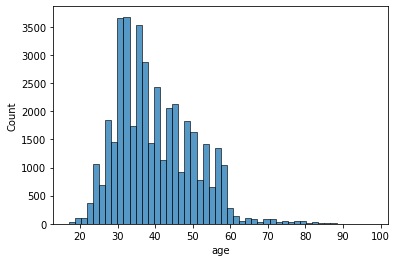

In [ ]:
sns.histplot(data=df1, x="age", bins=50)
print(df1["age"].skew())

3.263141255262832


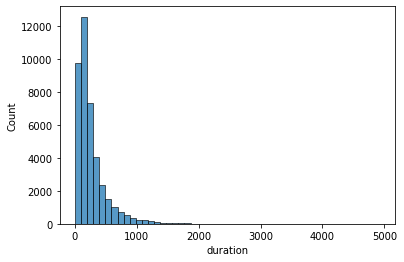

In [ ]:
sns.histplot(data=df1, x="duration", bins=50)
print(df1["duration"].skew())

4.762506697067009


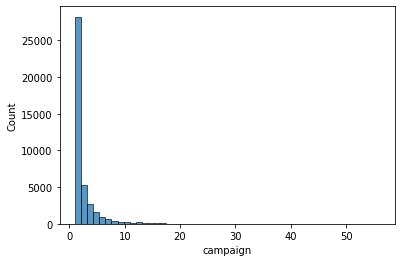

In [ ]:
sns.histplot(data=df1, x="campaign", bins=50)
print(df1["campaign"].skew())

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64
-4.922189916418162


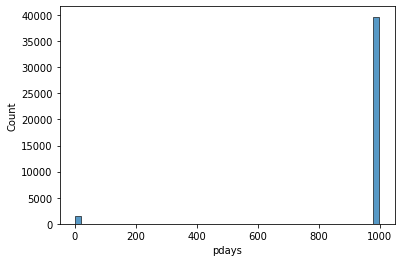

In [ ]:
sns.histplot(data=df1, x="pdays", bins=50)
print(df1["pdays"].value_counts())
print(df1["pdays"].skew())

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


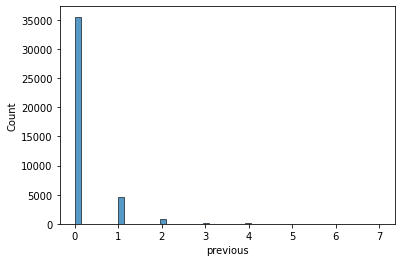

In [ ]:
sns.histplot(data=df1, x="previous", bins=50)
print(df1["previous"].value_counts())

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64
-0.7240955492472556


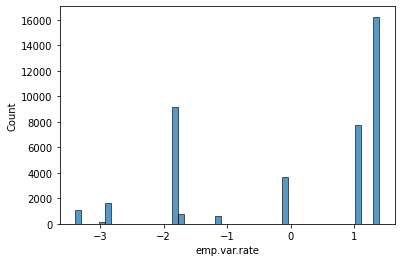

In [ ]:
sns.histplot(data=df1, x="emp.var.rate", bins=50)
print(df1["emp.var.rate"].value_counts())
print(df1["emp.var.rate"].skew())

-0.23088765135774464


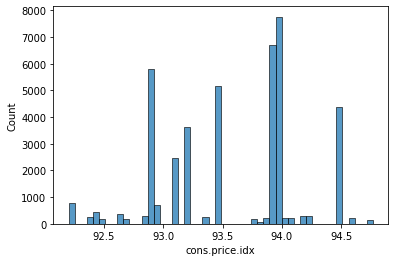

In [ ]:
sns.histplot(data=df1, x="cons.price.idx", bins=50)
print(df1["cons.price.idx"].skew())

In [ ]:
print(df1["cons.price.idx"].value_counts())

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64


0.30317985874819237


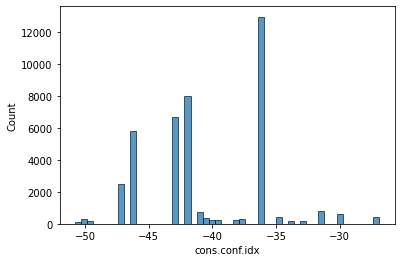

In [ ]:
sns.histplot(data=df1, x="cons.conf.idx", bins=50)
print(df1["cons.conf.idx"].skew())

In [ ]:
print(df1["cons.conf.idx"].value_counts())

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64


-0.7091879563778298


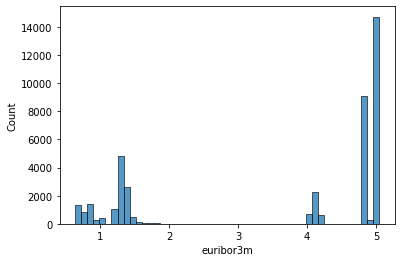

In [ ]:
sns.histplot(data=df1, x="euribor3m", bins=50)
print(df1["euribor3m"].skew())

In [ ]:
print(df1["euribor3m"].value_counts())

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64


5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64
-1.044262407089151


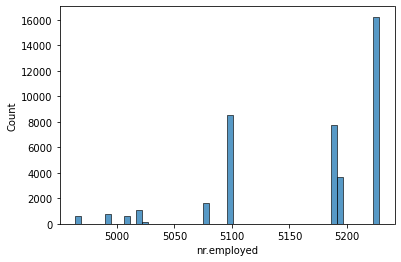

In [ ]:
sns.histplot(data=df1, x="nr.employed", bins=50)
print(df1["nr.employed"].value_counts())
print(df1["nr.employed"].skew())

previous is a discrete numerical value<br>
duration, campaign, pday, nr.employed are highly skewed

###**Categorical Feature**

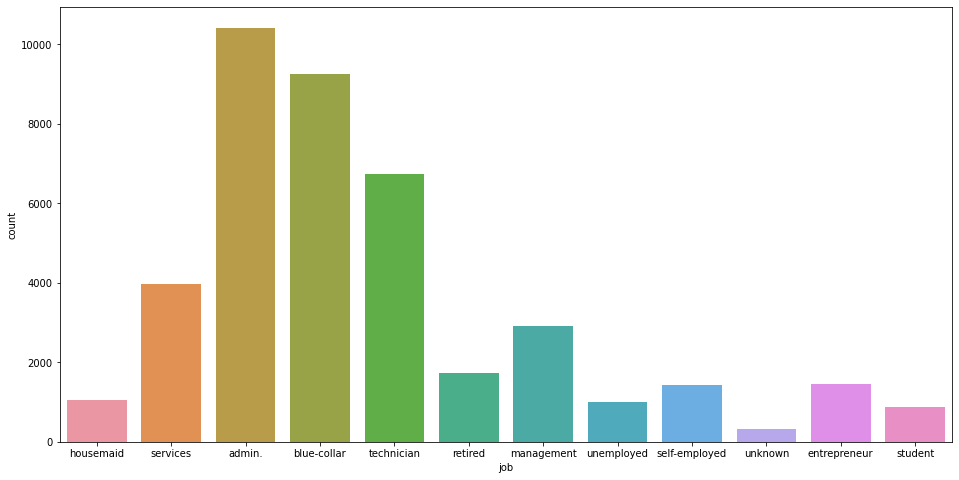

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df1, x="job")

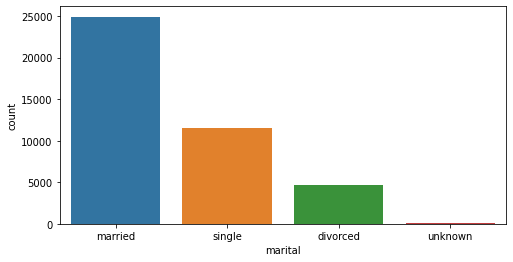

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x="marital")

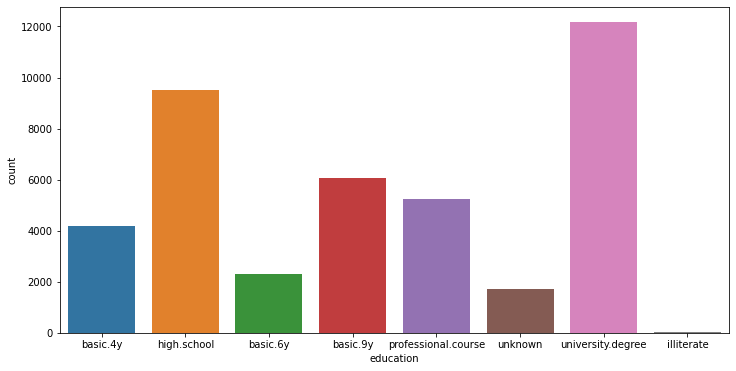

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x="education")

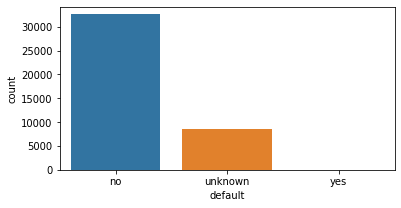

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df1, x="default")

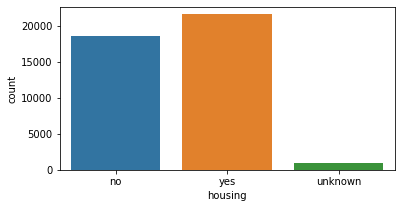

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df1, x="housing")

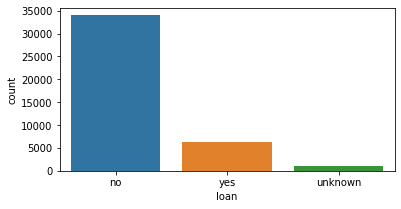

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df1, x="loan")

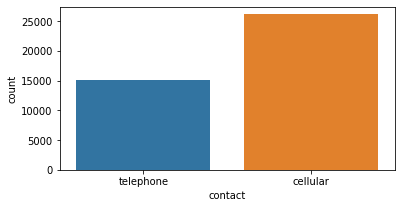

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df1, x="contact")

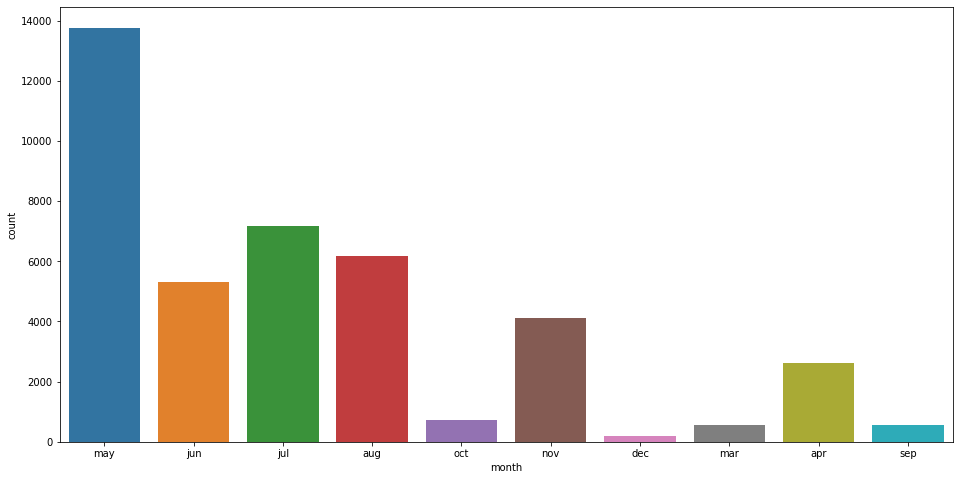

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df1, x="month")

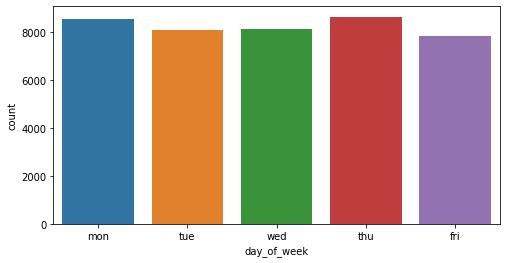

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x="day_of_week")

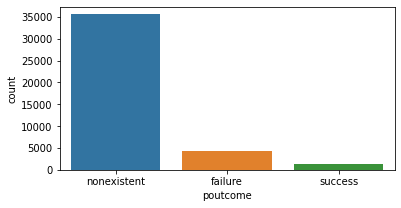

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df1, x="poutcome")

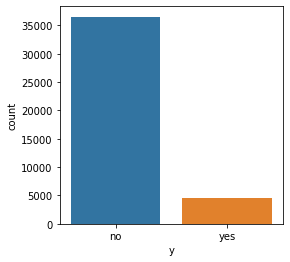

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df1, x="y")

## **Bivariate Analysis**

### **Conti-Conti Variable**

In [ ]:
num_lst = [i for i in df1.columns if df1[i].dtype == np.int64 or df1[i].dtype == np.float64]
num_lst

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

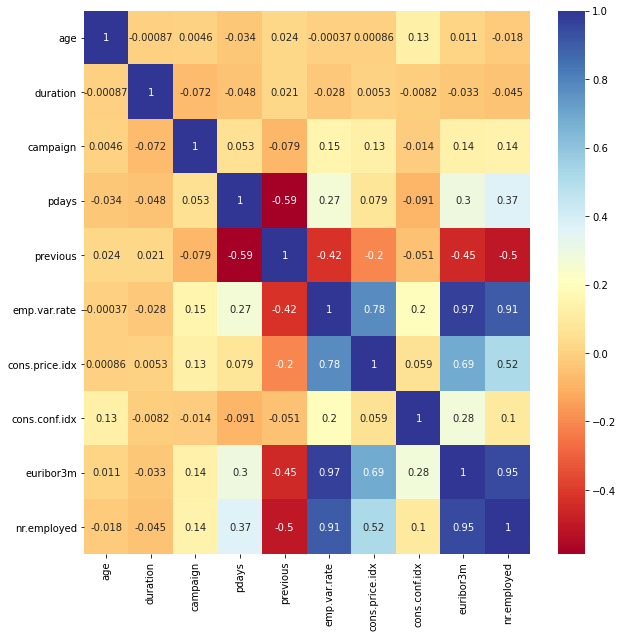

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1[num_lst].corr(), annot=True, cmap='RdYlBu')

emp.var.rate and nr.employed, emp.var.rate and euribor3m, euribor3m and nr.employed are highly correlated.

### **Conti-Cat**

In [ ]:
a = df1[df1["y"] == "no"]["duration"]
b = df1[df1["y"] == "yes"]["duration"]
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-89.9672253349018, pvalue=0.0)

In [ ]:
a = df1[df1["y"] == "no"]["age"]
b = df1[df1["y"] == "yes"]["age"]
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-6.172087109640128, pvalue=6.80213641846347e-10)

In [ ]:
a = df1[df1["y"] == "no"]["campaign"]
b = df1[df1["y"] == "yes"]["campaign"]
stats.ttest_ind(a, b)

Ttest_indResult(statistic=13.496542997299592, pvalue=2.0077799906175704e-41)

In [ ]:
a = df1[df1["y"] == "no"]["pdays"]
b = df1[df1["y"] == "yes"]["pdays"]
stats.ttest_ind(a, b)

Ttest_indResult(statistic=69.72211465560429, pvalue=0.0)

In [ ]:
a = df1[df1["y"] == "no"]["emp.var.rate"]
b = df1[df1["y"] == "yes"]["emp.var.rate"]
stats.ttest_ind(a, b)

Ttest_indResult(statistic=63.433665552940745, pvalue=0.0)

In [ ]:
a = df1[df1["y"] == "no"]["cons.price.idx"]
b = df1[df1["y"] == "yes"]["cons.price.idx"]
stats.ttest_ind(a, b)

Ttest_indResult(statistic=27.90322177968841, pvalue=9.318964779954352e-170)

In [ ]:
a = df1[df1["y"] == "no"]["cons.conf.idx"]
b = df1[df1["y"] == "yes"]["cons.conf.idx"]
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-11.153921944215295, pvalue=7.536664996589982e-29)

In [ ]:
a = df1[df1["y"] == "no"]["euribor3m"]
b = df1[df1["y"] == "yes"]["euribor3m"]
stats.ttest_ind(a, b)

Ttest_indResult(statistic=65.64662251866282, pvalue=0.0)

In [ ]:
a = df1[df1["y"] == "no"]["nr.employed"]
b = df1[df1["y"] == "yes"]["nr.employed"]
stats.ttest_ind(a, b)

Ttest_indResult(statistic=76.98448315100894, pvalue=0.0)

### **Cat-Cat**

In [ ]:
cat_lst = [i for i in df1.columns if df1[i].dtype == "object"]
cat_lst.pop()
cat_lst.append("previous")
cat_lst

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'previous']

(961.2424403289555,
 4.189763287563623e-199,
 11,
 array([[9247.91822861, 1174.08177139],
        [8211.49830048, 1042.50169952],
        [1291.97552685,  164.02447315],
        [ 940.58657862,  119.41342138],
        [2594.59920365,  329.40079635],
        [1526.23482568,  193.76517432],
        [1260.91842284,  160.08157716],
        [3521.87559483,  447.12440517],
        [ 776.42760027,   98.57239973],
        [5983.37292415,  759.62707585],
        [ 899.76867049,  114.23132951],
        [ 292.82412353,   37.17587647]]))

<Figure size 1152x576 with 0 Axes>

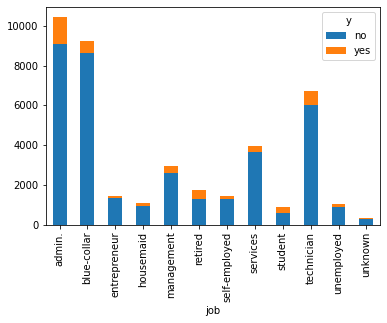

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["job"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(122.65515182252989,
 2.068014648442211e-26,
 3,
 array([[4.09243896e+03, 5.19561037e+02],
        [2.21197568e+04, 2.80824318e+03],
        [1.02648165e+04, 1.30318345e+03],
        [7.09876663e+01, 9.01233369e+00]]))

<Figure size 1152x576 with 0 Axes>

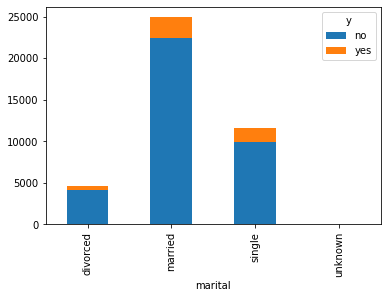

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["marital"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(193.10590454149565,
 3.3051890144025054e-38,
 7,
 array([[3.70555618e+03, 4.70443819e+02],
        [2.03379664e+03, 2.58203360e+02],
        [5.36400554e+03, 6.80994464e+02],
        [8.44309556e+03, 1.07190444e+03],
        [1.59722249e+01, 2.02777508e+00],
        [4.65235418e+03, 5.90645819e+02],
        [1.07972240e+04, 1.37077595e+03],
        [1.53599563e+03, 1.95004370e+02]]))

<Figure size 1152x576 with 0 Axes>

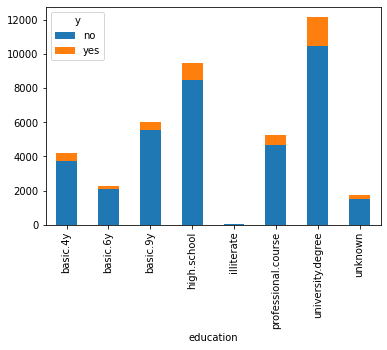

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["education"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(406.5775146420093,
 5.1619579513916376e-89,
 2,
 array([[2.89168259e+04, 3.67117413e+03],
        [7.62851209e+03, 9.68487909e+02],
        [2.66203749e+00, 3.37962513e-01]]))

<Figure size 1152x576 with 0 Axes>

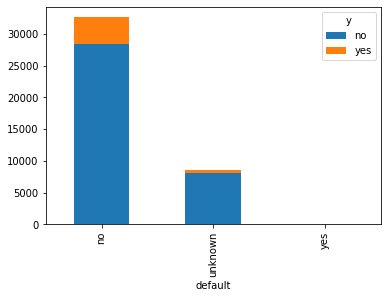

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["default"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(5.684495858974168,
 0.05829447669453452,
 2,
 array([[16524.15402544,  2097.84597456],
        [  878.47237059,   111.52762941],
        [19145.37360396,  2430.62639604]]))

<Figure size 1152x576 with 0 Axes>

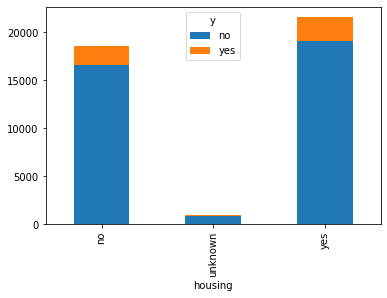

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["housing"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(1.094027551150338,
 0.5786752870441754,
 2,
 array([[30125.39089055,  3824.60910945],
        [  878.47237059,   111.52762941],
        [ 5544.13673886,   703.86326114]]))

<Figure size 1152x576 with 0 Axes>

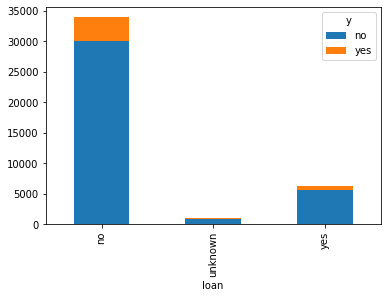

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["loan"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(862.3183642075705,
 1.5259856523129964e-189,
 1,
 array([[23198.7693503,  2945.2306497],
        [13349.2306497,  1694.7693503]]))

<Figure size 1152x576 with 0 Axes>

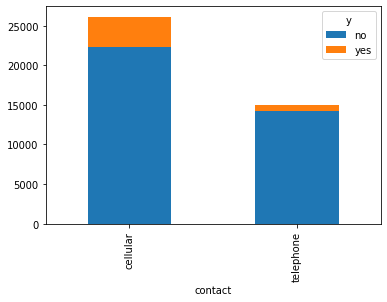

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["contact"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(3101.149351411678, 0.0, 9, array([[ 2335.49422162,   296.50577838],
        [ 5482.02253083,   695.97746917],
        [  161.49694086,    20.50305914],
        [ 6365.8189764 ,   808.1810236 ],
        [ 4718.905118  ,   599.094882  ],
        [  484.49082257,    61.50917743],
        [12217.86471788,  1551.13528212],
        [ 3639.00524425,   461.99475575],
        [  637.11430514,    80.88569486],
        [  505.78712246,    64.21287754]]))

<Figure size 1152x576 with 0 Axes>

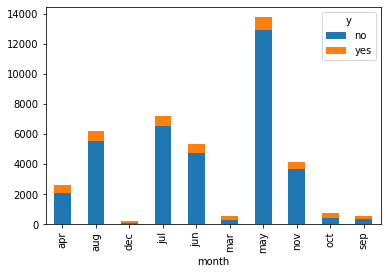

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["month"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(26.14493907587197,
 2.9584820052785324e-05,
 4,
 array([[6945.25580266,  881.74419734],
        [7554.8623871 ,  959.1376129 ],
        [7651.58308245,  971.41691755],
        [7178.62775566,  911.37224434],
        [7217.67097213,  916.32902787]]))

<Figure size 1152x576 with 0 Axes>

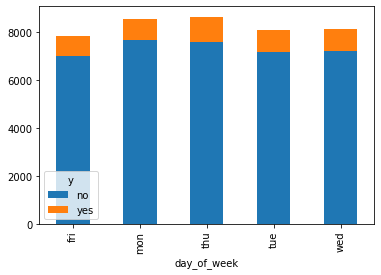

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["day_of_week"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(4230.5237978319765, 0.0, 2, array([[ 3772.99446441,   479.00553559],
        [31556.67971254,  4006.32028746],
        [ 1218.32582306,   154.67417694]]))

<Figure size 1152x576 with 0 Axes>

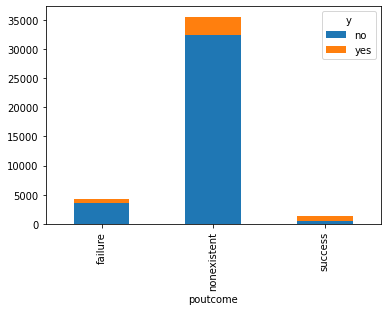

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["poutcome"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

(2299.436359620133, 0.0, 7, array([[3.15566797e+04, 4.00632029e+03],
        [4.04718433e+03, 5.13815674e+02],
        [6.69058755e+02, 8.49412450e+01],
        [1.91666699e+02, 2.43333010e+01],
        [6.21142080e+01, 7.88579198e+00],
        [1.59722249e+01, 2.02777508e+00],
        [4.43672914e+00, 5.63270856e-01],
        [8.87345829e-01, 1.12654171e-01]]))

<Figure size 1152x576 with 0 Axes>

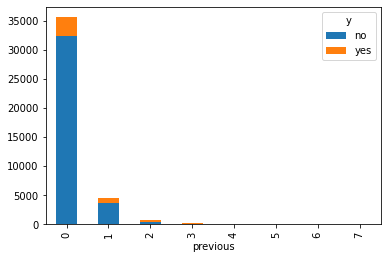

In [ ]:
plt.figure(figsize=(16, 8))
stackCol = pd.crosstab(df1["previous"], df1["y"])
stackCol.plot(kind='bar', stacked=True)
stats.chi2_contingency(np.array(stackCol))

housing and loan are not imp feature. poutcome and education are odinal variable

## **Transformation**

In [ ]:
df1.drop(["housing", "loan"], axis=1, inplace=True)

In [ ]:
df1 = df1.join(pd.get_dummies(df1[["job", "marital", "default", "contact", "y", "month", "day_of_week"]], drop_first=True))
df1

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,contact_telephone,y_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,housemaid,married,basic.4y,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,57,services,married,high.school,unknown,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,37,services,married,high.school,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,56,services,married,high.school,no,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
41184,46,blue-collar,married,professional.course,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41185,56,retired,married,university.degree,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41186,44,technician,married,professional.course,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
edu = {"unknown":-1, "illiterate":0, "high.school":1, "university.degree":2, "professional.course":3,
       "basic.4y":4, "basic.6y":5, "basic.9y":6}
pout = {"failure":0, "nonexistent":1, "success":2}

In [ ]:
edu_series = pd.Series(df1["education"])
df1["education_new"] = edu_series.map(edu)
df1

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,contact_telephone,y_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_new
0,56,housemaid,married,basic.4y,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,4
1,57,services,married,high.school,unknown,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,37,services,married,high.school,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,40,admin.,married,basic.6y,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5
4,56,services,married,high.school,no,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3
41184,46,blue-collar,married,professional.course,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
41185,56,retired,married,university.degree,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
41186,44,technician,married,professional.course,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3


In [ ]:
edu_series = pd.Series(df1["poutcome"])
df1["poutcome_new"] = edu_series.map(pout)
df1

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,contact_telephone,y_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_new,poutcome_new
0,56,housemaid,married,basic.4y,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,4,1
1,57,services,married,high.school,unknown,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
2,37,services,married,high.school,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3,40,admin.,married,basic.6y,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5,1
4,56,services,married,high.school,no,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1
41184,46,blue-collar,married,professional.course,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1
41185,56,retired,married,university.degree,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1
41186,44,technician,married,professional.course,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1


In [ ]:
# df1["duration_new"] = pd.Series(np.power(df1["duration"], 1/3))

In [ ]:
# df1["campaign_new"] = pd.Series(np.log(df1["campaign"]))

In [ ]:
df2 = df1.drop(["job", "marital", "default", "contact", "y", "education", "poutcome", "month", "day_of_week", "euribor3m", "nr.employed"],
               axis=1)
df2

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,contact_telephone,y_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_new,poutcome_new
0,56,261,1,999,0,1.1,93.994,-36.4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,4,1
1,57,149,1,999,0,1.1,93.994,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5,1
4,56,307,1,999,0,1.1,93.994,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1


# **IMP Function**

In [ ]:
#Evaluation
def result(model, X, y_true):
    pred = model.predict_proba(X)
    print('ROC-AUC:', roc_auc_score(y_true, pred[:, 1]))
    print("\nClassification report\n")
    pred = model.predict(X)
    print(classification_report(y_true, pred))
    print('\nConfusion matrix:')
    return confusion_matrix(y_true, pred)

In [ ]:
#Plotting Graph
def Score_cal(model, parameter, X_train, y_train, X_val, y_val_true):
    train_score, val_error, value_lst = [], [], []
    if(isinstance(model, DecisionTreeClassifier) or isinstance(model, XGBClassifier)):
        param_dict = model.get_params()
    else:
        param_dict = model.get_params()
        param_dict = {key:val for key, val in param_dict.items() if("base_estimator__" not in key)}
    key = list(parameter.keys())
    val = list(parameter.values())
    for parms, value in zip(key*len(val[0]), val[0]):
        value_lst.append(value)
        if(isinstance(model, DecisionTreeClassifier)):
            param_dict[parms] = value
            model = DecisionTreeClassifier(**param_dict)
        elif(isinstance(model, XGBClassifier)):
            param_dict[parms] = value
            model = XGBClassifier(**param_dict)
        else:
            param_dict[parms] = value
            param_dict["silent"] = True
            model = lgbm(**param_dict)
        model.fit(X_train, y_train)
        #Calculating Score
        train_pred = model.predict_proba(X_train)
        train_score.append(roc_auc_score(y_train, train_pred[:,1]))
        val_pred = model.predict_proba(X_val)
        val_error.append(roc_auc_score(y_val_true, val_pred[:,1]))
    return (train_score, val_error, value_lst)

def graph(tup):
    train, val, value = tup
    plt.grid()
    
    plt.plot(value, train, 'ro-', label="Training score")
    plt.plot(value, val, 'go-', label="Cross-validation score")
    plt.legend(loc="best")
    plt.xlabel("No. of values")
    plt.ylabel("AUC-ROC Score")
    return plt

# **Model Building**

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, learning_curve
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, chi2, SelectKBest, f_oneway
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency, ttest_ind
import pickle
from lightgbm import LGBMClassifier as lgbm
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

In [ ]:
X = df2.drop("y_yes", axis=1)
y = df2["y_yes"]

In [ ]:
#using pca
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

(41188, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, stratify=y)

In [ ]:
#appling sampling technique
os = SMOTE(sampling_strategy=0.7, n_jobs=-1)
us = NearMiss(sampling_strategy="majority", n_neighbors=5, n_jobs=-1)
pipe = Pipeline([("os", os), ("us", us)])
X_train_sample, y_train_sample = pipe.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
df2["y_yes"].value_counts()[0]/df2["y_yes"].value_counts()[1]

7.876724137931035

In [ ]:
X_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'default_unknown', 'default_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'education_new', 'poutcome_new'],
      dtype='object')

## **XGBoost**

In [ ]:
model3 = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=200, n_jobs=-1, scale_pos_weight=7.8767)
model3.fit(X_train, y_train)
print(result(model3, X_test, y_test))

ROC-AUC: 0.945180344591726

Classification report

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      7310
           1       0.40      0.94      0.57       928

    accuracy                           0.84      8238
   macro avg       0.70      0.88      0.73      8238
weighted avg       0.92      0.84      0.86      8238


Confusion matrix:
[[6026 1284]
 [  55  873]]


In [ ]:
model3 = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=200, n_jobs=-1, scale_pos_weight=7.8767)
cv = StratifiedKFold(n_splits=10)
score = cross_validate(model3, X_train, y_train, cv= cv, scoring="roc_auc", n_jobs=-1, return_estimator=True)
score

{'estimator': (XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.01, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, n_estimators=200, n_jobs=-1,
                nthread=None, objective='binary:logistic', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=7.8767, seed=None,
                silent=None, subsample=1, verbosity=1),
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.01, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, n_estimators=200, n_jobs=-1,
                nthread=None, objective='binary:logistic', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=7.8767, seed=None,
                silent=None, subsample=1, verbosity=1),
  XGB

In [ ]:
model3 = score["estimator"][np.argmax(score["test_score"])]
print(result(model3, X_test, y_test))

ROC-AUC: 0.9451779859899053

Classification report

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      7310
           1       0.41      0.94      0.57       928

    accuracy                           0.84      8238
   macro avg       0.70      0.88      0.73      8238
weighted avg       0.92      0.84      0.86      8238


Confusion matrix:
[[6028 1282]
 [  55  873]]


In [ ]:
parms = {"max_depth":[4, 5, 6, 7, 10, 15, 20],
         "learning_rate":[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
         "n_estimator":[50, 100, 150, 200, 250, 300, 500]}

In [ ]:
model3 = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=200, n_jobs=-1, scale_pos_weight=7.8767)
cv = StratifiedKFold()
search = RandomizedSearchCV(model3, parms, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=cv)

In [ ]:
search.fit(X_train, y_train)
search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimator=250,
              n_estimators=200, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=7.8767, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
model3 = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=200, n_jobs=-1)
model3.fit(X_train, y_train)
print(result(model3, X_test, y_test))

ROC-AUC: 0.9476772931506203

Classification report

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7310
           1       0.68      0.52      0.59       928

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238


Confusion matrix:
[[7087  223]
 [ 448  480]]


## **CatBoost**

In [ ]:
model4 = CatBoostClassifier(iterations=500, learning_rate=0.01, max_depth=10, objective="Logloss", silent=True, auto_class_weights="Balanced")
model4.fit(X_train, y_train)
print(result(model4, X_test, y_test))

ROC-AUC: 0.9483107988584367

Classification report

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      7310
           1       0.45      0.93      0.60       928

    accuracy                           0.86      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.86      0.88      8238


Confusion matrix:
[[6247 1063]
 [  69  859]]


In [ ]:
model4 = CatBoostClassifier(iterations=500, learning_rate=0.01, max_depth=10, objective="Logloss", silent=True, auto_class_weights="Balanced")
cv = StratifiedKFold(n_splits=10)
score = cross_validate(model4, X_train, y_train, cv= cv, scoring="roc_auc", n_jobs=-1, return_estimator=True)
score

{'estimator': (<catboost.core.CatBoostClassifier at 0x7f56fa463438>,
  <catboost.core.CatBoostClassifier at 0x7f56f9c54dd8>),
 'fit_time': array([38.9711895 , 38.45873618, 38.22109699, 38.13757372, 37.87521768,
        38.88413072, 39.01753974, 38.37839484, 38.6385963 , 38.37723875]),
 'score_time': array([0.03606629, 0.02779555, 0.0480063 , 0.02896428, 0.02847934,
        0.02761102, 0.02753258, 0.02976251, 0.03259754, 0.01264191]),
 'test_score': array([0.94574319, 0.95508313, 0.94235088, 0.95122898, 0.94497255,
        0.94868658, 0.94576071, 0.95043897, 0.934475  , 0.94584478])}

In [ ]:
model4 = score["estimator"][np.argmax(score["test_score"])]
print(result(model4, X_test, y_test))

ROC-AUC: 0.9483626880984952

Classification report

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7310
           1       0.45      0.93      0.61       928

    accuracy                           0.86      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.86      0.88      8238


Confusion matrix:
[[6256 1054]
 [  67  861]]


In [ ]:
parms = {"max_depth":[4, 5, 6, 7, 10, 15, 20],
         "learning_rate":[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
         "iterations":[50, 100, 150, 200, 250, 300, 400,600]}

In [ ]:
model4 = CatBoostClassifier(iterations=300, learning_rate=0.01, max_depth=10, objective="Logloss", silent=True, auto_class_weights="Balanced")
cv = StratifiedKFold()
search = RandomizedSearchCV(model4, parms, scoring="roc_auc", n_jobs=-1, cv=cv)

In [ ]:
search.fit(X_train, y_train)
search.best_params_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'iterations': 300, 'learning_rate': 0.1, 'max_depth': 5}

In [ ]:
model4 = CatBoostClassifier(iterations=300, learning_rate=0.1, max_depth=5, objective="Logloss", silent=True, auto_class_weights="Balanced")
model4.fit(X_train, y_train)
print(result(model4, X_test, y_test))

ROC-AUC: 0.9487945333506298

Classification report

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7310
           1       0.45      0.92      0.61       928

    accuracy                           0.87      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.87      0.88      8238


Confusion matrix:
[[6284 1026]
 [  73  855]]


In [ ]:
# model4 = CatBoostClassifier(iterations=50, learning_rate=0.5, max_depth=4, objective="Logloss", silent=True, auto_class_weights="Balanced")
# cv = StratifiedKFold(n_splits=10)
# score = cross_validate(model4, X_train, y_train, cv= cv, scoring="roc_auc", n_jobs=-1, return_estimator=True)
# score

In [ ]:
# model4 = score["estimator"][np.argmax(score["test_score"])]
# print(result(model4, X_test, y_test))

## **Stacking Xgboost and Catboost**

In [ ]:
xgb_pred = model3.predict_proba(X_test)
cat_pred = model4.predict_proba(X_test)

pred = (xgb_pred + cat_pred)/2
roc_auc_score(y_test, pred[:, 1])

0.9493537431010896

# **Saving Model**

In [ ]:
!pip install joblib

In [ ]:
import joblib
import pickle
with open('/content/drive/MyDrive/ML Data/Catboost.pkl', 'wb') as f:
  pickle.dump(model4, f)
# joblib.dump(model4, '/content/drive/MyDrive/ML Data/filename.pkl') 

In [ ]:
import joblib
import pickle
with open('/content/drive/MyDrive/ML Data/Xgboost.pkl', 'wb') as f:
  pickle.dump(model3, f)